# Lecture 5

Now that we are briefed with the basics of linear algebra, we are ready to dive deeper into Linear Programming.

---

## Definition 

  Linear Programming involves a linear objective function and a set of linear constraints, i.e., the objective function and constraints are expressed as linear combination of decision variables.

  For instance, the following problem is a linear optimisation problem,

  Objective: 

  $$
  \min_{x_1,x_2} \ f(x_1, x_2) = c_1x_1 + c_2x_2 
  $$

  Subject to: 

  $$
  \begin{aligned}
  & a_{11}x_1 + a_{12}x_2 \geq b_1 \\
  & a_{21}x_1 + a_{22}x_2 \geq b_2 \\
  & a_{31}x_1 + a_{32}x_2 \geq b_3 \\
  & x_1, x_2 \geq 0
  \end{aligned}
  $$

  However, the following problem is not a linear optimisation problem,

  Objective: 

  $$
  \min_{x_1,x_2} \ f(x_1, x_2) = c_1x_1 + c_2 x_2 + c_3x_1x_2
  $$

  Subject to: 

  $$
  \begin{aligned}
  & a_{11}x_1 + a_{12}x_2 \geq b_1 \\
  & a_{21}x_1 + a_{22}x_2 \geq b_2 \\
  & a_{31}x_1 + a_{32}x_2 \geq b_3 \\
  & x_1, x_2 \geq 0
  \end{aligned}
  $$

  And neither is this,

  Objective: 

  $$
  \min_{x_1,x_2} \ f(x_1, x_2) = c_1x_1 + c_2 x_2
  $$

  Subject to: 

  $$
  \begin{aligned}
  & a_{11}x_1 + a_{12}x_2 + a_{13}x_1x_2 \geq b_1 \\
  & a_{21}x_1 + a_{22}x_2 + a_{23}x_1x_2 \geq b_2 \\
  & a_{31}x_1 + a_{32}x_2 + a_{33}x_1x_2 \geq b_3 \\
  & x_1, x_2 \geq 0
  \end{aligned}
  $$

  Thus, a general linear optimisation problem can be expressed as,

  Objective:
  
  $$
  \min_{\mathbf{x}} \ f(\mathbf{x}) = c_1x_1 + c_2x_2 + ... + c_mx_m
  $$

  Subject to:

  $$
  \begin{aligned}
  & a_{11}x_1 + a_{12}x_2 + ... + a_{1m}x_m \geq b_1 \\
  & a_{21}x_1 + a_{22}x_2 + ... + a_{2m}x_m = b_2 \\
  & ... \\
  & a_{n1}x_1 + a_{n2}x_2 + ... + a_{nm}x_m \geq b_n \\
  & x_i \geq 0 \ \forall \ i \in [1,m] 
  \end{aligned}
  $$

  Here, $f(\mathbf{x})$ is the objective function, $x_i$ is a decision variable, $a_{i1}x_1 + a_{i2}x_2 + ... + a_{im}x_m \geq/= b_i$ is a technological constraint, and $x_i \geq 0$ is a domain constriant. Thus, the set of values of the decision variables that satisfy these constraints constitute the feasible region; hence, any value in this region is referred to as a feasible value; and therefore, the value in this feasible region that optimises the objective function is called the optimal solution.

  ## Assumptions
  1. Proportionality - The contribution of each decision variable to the objective function and constraints is poroportional to the value of the variable.
  2. Additivity - The contribution of each decision variable to the objective function and constraints is independent of the values of other decision variables.
  3. Divisibility - The decision variables are allowed to take fractional values.
  4. Certainty - All the parameters are known with certainty.

  ## Example
  Consider a textile firm operating in Kochi. This company needs to ship 100 tons of textile goods from Kanchipuram and can rent two types of trucks: T1 and T2. Each truck of type T1 can carry 10 tons of goods and costs ₹5000 per trip, while each truck of type T2 can carry 20 tons and costs ₹8000 per trip. Thus, how many T1 and T2 type trucks should the company deploy so as to minimize the total costs?

  Obective:

  $$
  \min_{x_1, x_2} \ Z = 5000x_1 + 8000x_2
  $$

  Subject to:

  $$
  \begin{aligned}
    & 10x_1 + 20x_2 \geq 100 \\
    & x_1, x_2 \geq 0
  \end{aligned}
  $$

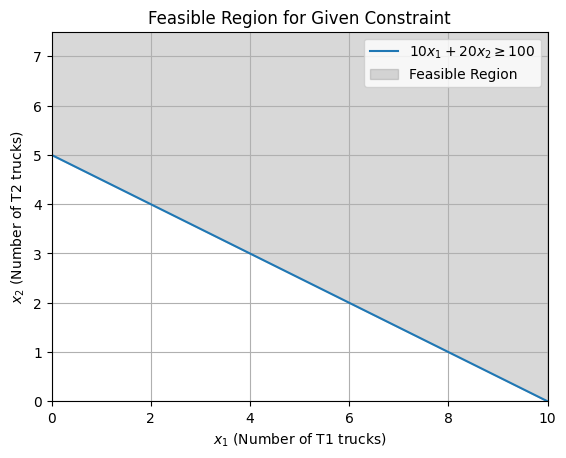

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constraint coefficients
a11, a12, b1 = 10, 20, 100  # Coefficients for the constraint a11 * x1 + a12 * x2 >= b1

# Define the range for x1 and x2
x1 = np.linspace(0, b1/a11, 100) 
x2 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1

# Plot the constraints
plt.plot(x1, x2, label=rf'${a11}x_1 + {a12}x_2 \geq {b1}$')

# Fill the feasible region
plt.fill_between(x1, x2, max(x2) * 1.5, color='grey', alpha=0.3, label="Feasible Region")
                 
# Set plot attributes
plt.xlim(0, max(x1))
plt.ylim(0, 1.5 * max(x2))
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.legend()
plt.title("Feasible Region for Given Constraint")
plt.grid(True)

# Display the figure
plt.show()

  ## Example #2
  
  Consider a textile firm operating in Kochi. This company needs to ship 100 tons of textile goods from Kanchipuram and can rent two types of trucks: T1 and T2. Each truck of type T1 can carry 10 tons of goods and costs ₹5000 per trip, while each truck of type T2 can carry 20 tons and costs ₹8000 per trip. Considering the managerial capacity of the firm (warehouse capacity, staff numbers, etc.), the management committee has imposed an upper limit on truck rental of 20 trucks. All things considered, how many T1 and T2 type trucks should the company deploy so as to minimize the total costs?

  Obective:

  $$
  \min_{x_1, x_2} \ Z = 5000x_1 + 8000x_2
  $$

  Subject to:

  $$
  \begin{aligned}
    & 10x_1 + 20x_2 \geq 100 \\
    & x_1 + x_2 \leq 20 \\
    & x_1, x_2 \geq 0
  \end{aligned}
  $$

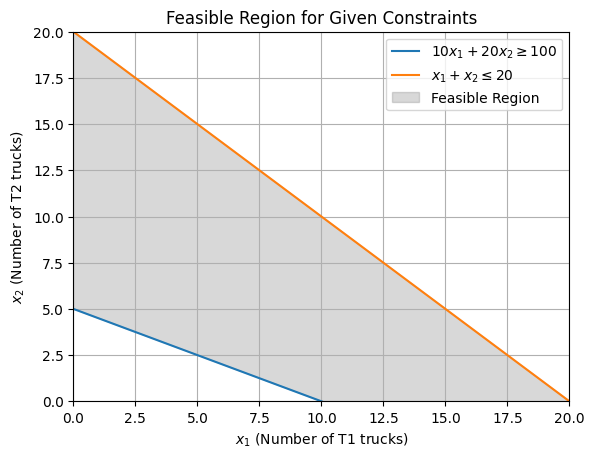

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constraint coefficients
a11, a12, b1 = 10, 20, 100  # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 1, 20     # Coefficients for constraint a21 * x1 + a22 * x2 <= b2

# Define the constraints
x1 = np.linspace(0, max(b1/a11, b2/a21), 100)
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = (b2 - a21 * x1) / a22  # From a21 * x1 + a22 * x2 <= b2

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11}x_1 + {a12}x_2 \geq {b1}$')
plt.plot(x1, x2_2, label=fr'$x_1 + x_2 \leq {b2}$')

# Fill the feasible region where both constraints are met
plt.fill_between(x1, x2_1, x2_2, color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, max(b1/a11, b2/a21))
plt.ylim(0, max(b1/a12, b2/a22))
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.legend()
plt.title("Feasible Region for Given Constraints")
plt.grid(True)

# Display the plot
plt.show()

  ## Example #3

  Consider a textile firm operating in Kochi. This company needs to ship 100 tons of textile goods from Kanchipuram and can rent two types of trucks: T1 and T2. Each truck of type T1 can carry 10 tons of goods and costs ₹5000 per trip, while each truck of type T2 can carry 20 tons and costs ₹8000 per trip. Considering the managerial capacity of the firm (warehouse capacity, staff numbers, etc.), the management committee has imposed an upper limit on truck rental of 20 trucks in total, with a maximum of 12 any individual type of truck. Thus, all things considered, how many T1 and T2 type trucks should the company deploy so as to minimize the total costs?

  Obective:

  $$
  \min_{x_1, x_2} \ Z = 5000x_1 + 8000x_2
  $$

  Subject to:

  $$
  \begin{aligned}
    & 10x_1 + 20x_2 \geq 100 \\
    & x_1 + x_2 \leq 20 \\
    & x_1 \leq 12 \\
    & x_2 \leq 12 \\
    & x_1, x_2 \geq 0
  \end{aligned}
  $$

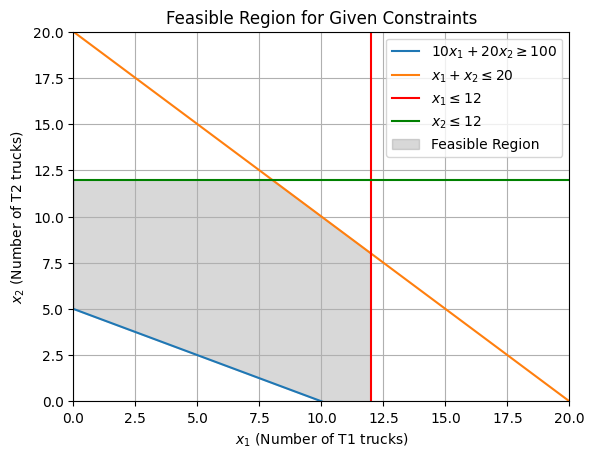

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Constraint coefficients
a11, a12, b1 = 10, 20, 100  # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 1, 20     # Coefficients for constraint a21 * x1 + a22 * x2 <= b2
a31, a32, b3 = 1, 0, 12     # Coefficients for constraint a31 * x1 <= b3
a41, a42, b4 = 0, 1, 12     # Coefficients for constraint a42 * x2 <= b4

# Define the constraints
x1 = np.linspace(0, max(b1/a11, b2/a21, b3/a31), 400)
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = (b2 - a21 * x1) / a22  # From a21 * x1 + a22 * x2 <= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 <= b3
x2_4 = np.full_like(x1, b4)   # From a42 * x2 <= b4

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11}x_1 + {a12}x_2 \geq {b1}$')
plt.plot(x1, x2_2, label=fr'$x_1 + x_2 \leq {b2}$')
plt.axvline(x=b3, label=fr'$x_1 \leq {b3}$', color='red')
plt.axhline(y=b4, label=fr'$x_2 \leq {b4}$', color='green')

# Fill the feasible region where all constraints are satisfied
plt.fill_between(x1, x2_1, np.minimum(x2_2,b4), where=(x1 <= b3), color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, max(b1/a11, b2/a21))
plt.ylim(0, max(b1/a12, b2/a22))
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.title("Feasible Region for Given Constraints")
plt.legend()
plt.grid(True)

# Display th eplot
plt.show()

Note: 
1. While all the three feasible regions are valid for the constraints we have developed, in real-world applications number of T1 trucks and number of T2 trucks need to be integer. Hence, instead of $x_1, x_2 \geq 0$, we must have $x_1,x_2 \in \mathbb{Z}_+$. Consequently, the feasible region will only include integer points for the decision variable.
2. Further, for a general $n$-dimensional problem, i.e., for a problem with $n$ decision variables, we will have an $n$ dimensional feasible region.